In [35]:
#importing dependencies

from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#Loading CSV

# df = pd.read_csv(os.path.join("..", "Resources", "tennis_data.csv"))
df = pd.read_csv(os.path.join("Resources", "tennis_data.csv"))

df.head()

C:\Users\Laurent\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,pl1_flag,pl1_year_pro,pl1_weight,pl1_height,pl1_hand,pl2_flag,pl2_year_pro,pl2_weight,pl2_height,pl2_hand
0,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Kwon S.W.,...,KOR,2015.0,72.0,180.0,Right-Handed,JPN,2014.0,64.0,170.0,Left-Handed
1,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Monteiro T.,...,BRA,2011.0,78.0,183.0,Left-Handed,GER,2014.0,80.0,188.0,Right-Handed
2,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Djere L.,...,SRB,2013.0,80.0,185.0,Right-Handed,ESP,2011.0,76.0,180.0,Right-Handed
3,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Johnson S.,...,USA,2012.0,86.0,188.0,Right-Handed,AUS,2018.0,85.0,188.0,Right-Handed
4,1,Adelaide,Adelaide International 1,2022-01-04,ATP250,Outdoor,Hard,1st Round,3,Moutet C.,...,FRA,2016.0,71.0,175.0,Left-Handed,DEN,2020.0,77.0,188.0,Right-Handed


In [12]:
# dataframe 1 : percentage of games won per player

df_winner = df.groupby(by=["Winner"]).count().rename(columns={"ATP":"games_played"}).reset_index()[["Winner","games_played"]]
df_loser = df.groupby(by=["Loser"]).count().rename(columns={"ATP":"games_played"}).reset_index()[["Loser","games_played"]]
df_games = pd.merge(df_winner, df_loser, left_on="Winner", right_on="Loser", how="inner", suffixes=("_win", "_lose"))
df_games["games_played"] = df_games["games_played_win"] + df_games["games_played_lose"]
df_games = df_games.rename(columns={"Winner":"player_name"})[["player_name", "games_played","games_played_win"]]
df_games["win_percentage"] = df_games["games_played_win"]/df_games["games_played"]
df_games.head()

,player_name,games_played,games_played_win,win_percentage
0,Acasuso J.,99,50,0.505051
1,Ahouda A.,4,1,0.250000
2,Ajdukovic D.,2,1,0.500000
3,Albot R.,184,73,0.396739
4,Alcaraz C.,49,30,0.612245


In [14]:
# dataframe 2 : player statistics for each player

df_player_stats = df.groupby(by=["Winner"]).first().reset_index().rename(columns={
    "Winner":"player_name", 
    "pl1_weight":"weight",
    "pl1_height": "height",
    "pl1_hand": "hand"})[["player_name","weight","height","hand"]]
df_player_stats.head()

,player_name,weight,height,hand
0,Acasuso J.,86.0,191.0,Right-Handed
1,Ahouda A.,76.0,185.0,Right-Handed
2,Ajdukovic D.,77.0,185.0,Right-Handed
3,Albot R.,69.0,175.0,Right-Handed
4,Alcaraz C.,72.0,185.0,Right-Handed


In [15]:
# dataframe merged : merge of df_games, df_player_stats on player name
df_merged = pd.merge(df_games, df_player_stats, on="player_name", how="inner")
df_merged.head()

,player_name,games_played,games_played_win,win_percentage,weight,height,hand
0,Acasuso J.,99,50,0.505051,86.0,191.0,Right-Handed
1,Ahouda A.,4,1,0.250000,76.0,185.0,Right-Handed
2,Ajdukovic D.,2,1,0.500000,77.0,185.0,Right-Handed
3,Albot R.,184,73,0.396739,69.0,175.0,Right-Handed
4,Alcaraz C.,49,30,0.612245,72.0,185.0,Right-Handed


In [16]:
#Cleaning Data Frame

df_merged = df_merged.dropna()
df_merged


,player_name,games_played,games_played_win,win_percentage,weight,height,hand
0,Acasuso J.,99,50,0.505051,86.0,191.0,Right-Handed
1,Ahouda A.,4,1,0.250000,76.0,185.0,Right-Handed
2,Ajdukovic D.,2,1,0.500000,77.0,185.0,Right-Handed
3,Albot R.,184,73,0.396739,69.0,175.0,Right-Handed
4,Alcaraz C.,49,30,0.612245,72.0,185.0,Right-Handed
...,...,...,...,...,...,...,...
657,Zopp J.,47,16,0.340426,88.0,191.0,Right-Handed
658,Zovko L.,5,2,0.400000,80.0,191.0,Right-Handed
659,Zverev A.,430,297,0.690698,86.0,198.0,Right-Handed
660,Zverev M.,313,125,0.399361,88.0,191.0,Left-Handed


# Pre-processing

In [37]:
df_clean = pd.get_dummies(df_merged, columns=["hand"])
df_clean.tail()

,player_name,games_played,games_played_win,win_percentage,weight,height,hand_Left-Handed,hand_Right-Handed
657,Zopp J.,47,16,0.340426,88.0,191.0,0,1
658,Zovko L.,5,2,0.400000,80.0,191.0,0,1
659,Zverev A.,430,297,0.690698,86.0,198.0,0,1
660,Zverev M.,313,125,0.399361,88.0,191.0,1,0
661,de Voest R.,4,2,0.500000,68.0,180.0,0,1


In [52]:
X = df_clean[["weight","height","hand_Left-Handed","hand_Right-Handed"]]
y = df_clean["win_percentage"].values.reshape(-1,1)

In [38]:
print(X)

     weight  height  hand_Left-Handed  hand_Right-Handed
0      86.0   191.0                 0                  1
1      76.0   185.0                 0                  1
2      77.0   185.0                 0                  1
3      69.0   175.0                 0                  1
4      72.0   185.0                 0                  1
..      ...     ...               ...                ...
657    88.0   191.0                 0                  1
658    80.0   191.0                 0                  1
659    86.0   198.0                 0                  1
660    88.0   191.0                 1                  0
661    68.0   180.0                 0                  1

[633 rows x 4 columns]


In [40]:
print(y.max())

win_percentage    0.857878
dtype: float64


In [42]:
print(y.max())

0.8578784757981462


In [43]:
print(y)

[[0.50505051]
 [0.25      ]
 [0.5       ]
 [0.39673913]
 [0.6122449 ]
 [0.61386139]
 [0.41176471]
 [0.41176471]
 [0.1875    ]
 [0.5       ]
 [0.61428571]
 [0.58375635]
 [0.25      ]
 [0.48444444]
 [0.30555556]
 [0.41223404]
 [0.05882353]
 [0.5       ]
 [0.28571429]
 [0.11764706]
 [0.60674157]
 [0.5       ]
 [0.35714286]
 [0.46153846]
 [0.5199115 ]
 [0.32978723]
 [0.25      ]
 [0.37209302]
 [0.15384615]
 [0.53333333]
 [0.4       ]
 [0.28205128]
 [0.5       ]
 [0.5       ]
 [0.44680851]
 [0.47470817]
 [0.28571429]
 [0.63245033]
 [0.59821429]
 [0.38297872]
 [0.22916667]
 [0.40728477]
 [0.46043165]
 [0.47229551]
 [0.31944444]
 [0.16666667]
 [0.50125313]
 [0.41949153]
 [0.66476462]
 [0.4       ]
 [0.42045455]
 [0.37433155]
 [0.65142857]
 [0.35      ]
 [0.36842105]
 [0.54028436]
 [0.42857143]
 [0.22222222]
 [0.41880342]
 [0.43209877]
 [0.33333333]
 [0.31818182]
 [0.30769231]
 [0.5       ]
 [0.5       ]
 [0.2       ]
 [0.23076923]
 [0.38255034]
 [0.33333333]
 [0.65517241]
 [0.39240506]
 [0.25

# Splitting training data

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Scaling data

In [45]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transforming data

In [46]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [48]:
#Finding R^2-score to verify accuracy

model.score(X_test_scaled, y_test_scaled)

-1.9563987993975647

(-2.647160242284498, 3.0)

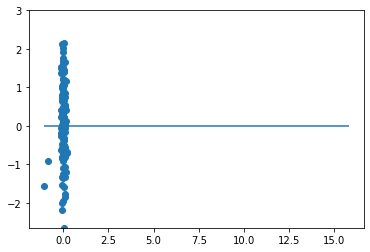

In [58]:
predictions = model.predict(X_test_scaled)

plt.scatter(predictions,predictions - y_test_scaled)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.ylim([(predictions - y_test_scaled).min(), 3])

In [59]:
print(predictions)

[[ 5.40502210e-02]
 [ 5.31880473e-02]
 [ 1.03313773e-02]
 [-1.08515689e-02]
 [-7.04488939e-02]
 [ 1.21855652e-01]
 [ 7.17844724e-02]
 [-8.43750955e-02]
 [ 1.00541284e-01]
 [-8.25831275e-01]
 [-9.12722150e-03]
 [-9.52119574e-02]
 [-4.21949012e-02]
 [ 2.61555834e-02]
 [-3.35731644e-02]
 [ 1.57909367e+01]
 [ 7.60953408e-02]
 [ 2.32097072e-02]
 [ 3.47773201e-02]
 [ 7.26466460e-02]
 [ 1.08791625e-01]
 [ 2.75205756e-02]
 [-9.98939518e-03]
 [-1.68867846e-02]
 [ 3.09692703e-02]
 [-5.82048052e-02]
 [ 3.07463272e-03]
 [-1.43002636e-02]
 [ 9.36438942e-02]
 [-3.91055616e-02]
 [ 3.47773201e-02]
 [-4.04705538e-02]
 [ 6.02050886e-03]
 [-4.39192485e-02]
 [ 5.66367420e-02]
 [ 7.69575144e-02]
 [ 5.74989157e-02]
 [ 6.88268253e-03]
 [-3.70218591e-02]
 [ 1.58731382e-01]
 [-1.26052471e-01]
 [-8.76880575e-04]
 [-1.60246109e-02]
 [ 7.74485621e-03]
 [-8.17885744e-02]
 [-5.64804579e-02]
 [-3.96083802e-02]
 [-1.60246109e-02]
 [ 2.57181414e-03]
 [ 3.43398782e-03]
 [-5.90669789e-02]
 [-1.34380899e-02]
 [-1.4300263

In [60]:
y_scaler.inverse_transform(predictions)

array([[0.40068787],
       [0.40056767],
       [0.39459297],
       [0.39163983],
       [0.38333129],
       [0.41014071],
       [0.40316022],
       [0.38138982],
       [0.40716924],
       [0.2780225 ],
       [0.39188022],
       [0.37987904],
       [0.38727021],
       [0.39679904],
       [0.38847218],
       [2.59458671],
       [0.4037612 ],
       [0.39638835],
       [0.39800101],
       [0.40328042],
       [0.40831943],
       [0.39698934],
       [0.39176002],
       [0.39079845],
       [0.39747012],
       [0.38503825],
       [0.3935813 ],
       [0.39115904],
       [0.40620767],
       [0.3877009 ],
       [0.39800101],
       [0.38751061],
       [0.39399198],
       [0.38702982],
       [0.40104846],
       [0.4038814 ],
       [0.40116865],
       [0.39411218],
       [0.38799139],
       [0.4152816 ],
       [0.37557953],
       [0.39303041],
       [0.39091865],
       [0.39423238],
       [0.38175041],
       [0.38527865],
       [0.3876308 ],
       [0.390

In [62]:
X_test.iloc[15]

weight                79.0
height               185.0
hand_Left-Handed       0.0
hand_Right-Handed      1.0
Name: 651, dtype: float64